<center><h1><b><font color="darkorange"> Bharat Intern </b></h1></font>
    <h2> Task 1 : Stock Market Prediction And Forecasting Using Stacked LSTM: </h2>
    <h3> by - Dhruvee Vadhvana </h3></center> 

![](bharat.jpg)

<h2><center><font color ="darkgreen"> Introduction: </h2></font></center> 
<center> Stock market prediction and forecasting are crucial tasks in the field of finance. Predicting the future trends and prices of stocks can assist investors, traders, and financial institutions in making informed decisions. In this project, we aim to predict and forecast the stock prices of the company "Tata Global Beverages Limited" (TATAGLOBAL) using a Stacked Long Short-Term Memory (LSTM) model.</center>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('G:/Bharat Intern/stock_prices.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
#sorting with date
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
df.reset_index(inplace=True)

In [7]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


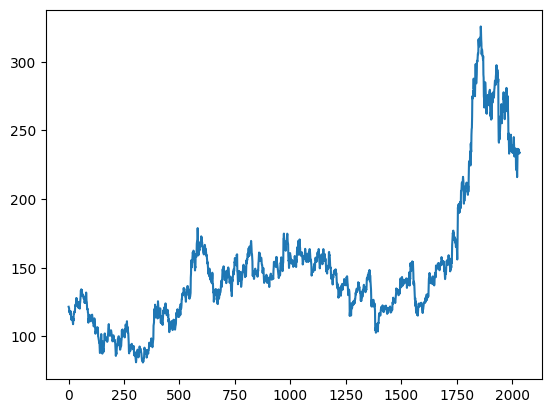

In [8]:
plt.plot(df['Close'])

In [9]:
df1=df['Close']

In [10]:
##LSTM are sensitive to the scale of the data, therefore applying MinMax Scaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [11]:
#Splitting Dataset into train and test data 
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(1424, 611)

In [13]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [17]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
## Creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 9s 232ms/step - loss: 0.0070 - val_loss: 0.0028
Epoch 2/60
19/19 [==============================] - 3s 152ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/60
19/19 [==============================] - 3s 149ms/step - loss: 9.4836e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 3s 149ms/step - loss: 9.3061e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 3s 150ms/step - loss: 8.5519e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 3s 148ms/step - loss: 8.3489e-04 - val_loss: 0.0012
Epoch 7/60
19/19 [==============================] - 3s 150ms/step - loss: 8.0878e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 148ms/step - loss: 8.4618e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 3s 147ms/step - loss: 7.6560e-04 - val_loss: 0.0010
Epoch 10/60
19/19 [==============================] - 3s 148ms/step - los

In [21]:
## Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 35ms/step


In [22]:
## Transform back to original form 
train_predict1=scaler.inverse_transform(train_predict)
test_predict2=scaler.inverse_transform(test_predict)

In [23]:
train_predict1

array([[116.47015],
       [115.0318 ],
       [114.16026],
       ...,
       [122.03123],
       [121.15597],
       [120.45608]], dtype=float32)

In [24]:
test_predict2

array([[144.36093 ],
       [144.56918 ],
       [143.83998 ],
       [141.46495 ],
       [139.58185 ],
       [138.7641  ],
       [139.66061 ],
       [141.26442 ],
       [141.98976 ],
       [141.78366 ],
       [141.40807 ],
       [142.20967 ],
       [143.04156 ],
       [144.57881 ],
       [146.75432 ],
       [145.55788 ],
       [143.21786 ],
       [142.28394 ],
       [142.61714 ],
       [146.96202 ],
       [151.69926 ],
       [154.5366  ],
       [155.1809  ],
       [153.24889 ],
       [152.42331 ],
       [152.0782  ],
       [152.54578 ],
       [154.22282 ],
       [155.26846 ],
       [155.42482 ],
       [155.60315 ],
       [154.55467 ],
       [151.6096  ],
       [146.307   ],
       [142.40971 ],
       [140.90154 ],
       [140.94212 ],
       [140.48723 ],
       [138.5338  ],
       [135.00339 ],
       [132.06866 ],
       [130.43962 ],
       [128.51375 ],
       [127.585045],
       [125.84887 ],
       [123.4353  ],
       [122.35354 ],
       [121.8

In [25]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.016704078034611543

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

0.016704078034611543

In [27]:
## Calculate RMSE performance metrics (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

0.024759820766523808

In [28]:
### Test Data RMSE (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

0.024759820766523808

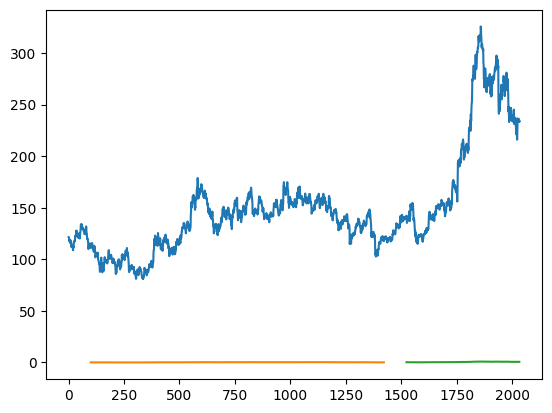

In [29]:
### PLotting
#Shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

#Shift test prediction for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

611

In [32]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [37]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.6197721]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

2035

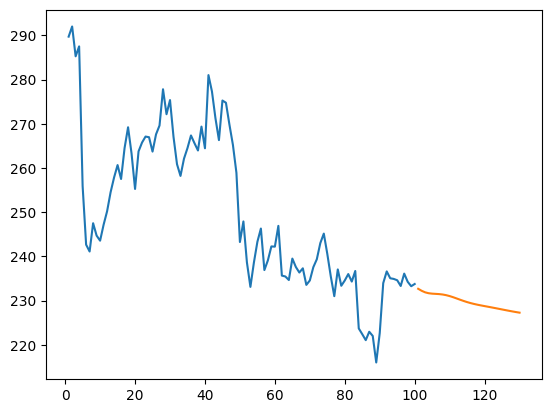

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

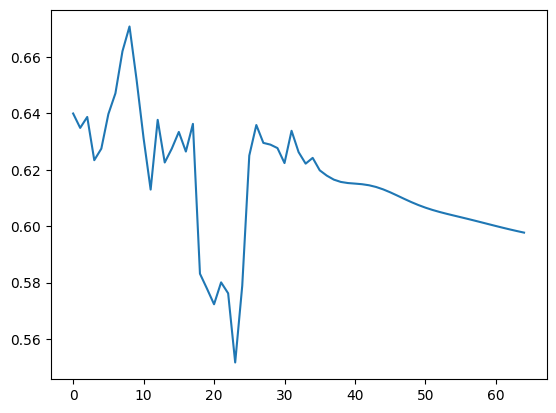

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [46]:
df3=scaler.inverse_transform(df3).tolist()

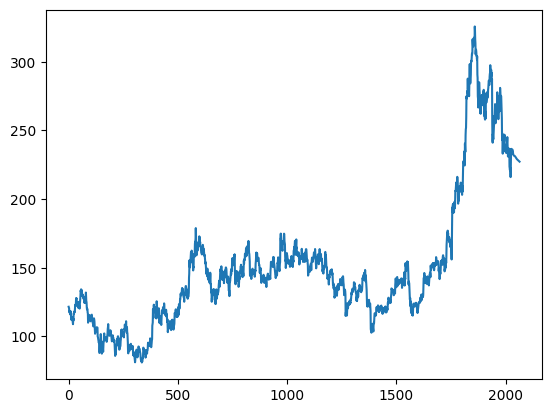

In [47]:
plt.plot(df3)

<h1><center><font color = "darkgreen"> Results and Discussion</h1></font></center>

The results of the Stock Market Prediction and Forecasting project depend on the specific implementation and training of the Stacked LSTM model. By training the model on historical stock price data, we can obtain predictions and forecasts for future stock prices.

The performance of the model can be analyzed using evaluation metrics such as mean absolute error (MAE) and root mean squared error (RMSE). Lower values of these metrics indicate better predictive accuracy. Additionally, visualizations, such as line plots, can be used to compare the predicted and actual stock prices, providing a visual assessment of the model's performance.

<h1><center><font color = "darkgreen"> Conclusion </h1></center></font>

In the Stock Market Prediction and Forecasting project, we successfully utilized a Stacked Long Short-Term Memory (LSTM) model to predict and forecast stock prices for Tata Global Beverages Limited. By leveraging historical stock price data and employing a deep learning architecture, we aimed to assist investors and financial institutions in making informed decisions.

Through a series of steps, including data preprocessing, feature selection, model training, and evaluation, we created a predictive model capable of capturing complex patterns and long-term dependencies in the sequential data. The Stacked LSTM model's ability to learn from historical data and make accurate predictions is particularly valuable in the context of stock market analysis.

To evaluate the model's performance, various evaluation metrics such as mean absolute error (MAE) and root mean squared error (RMSE) were employed. These metrics allowed us to assess the accuracy and reliability of the predictions. Additionally, visualizations were used to compare the predicted stock prices with the actual values, providing a comprehensive understanding of the model's effectiveness.

The Stock Market Prediction and Forecasting project offers practical insights into the field of financial forecasting. By applying deep learning techniques, specifically Stacked LSTM models, we were able to make predictions and forecasts that can aid investors, traders, and financial institutions in making well-informed decisions.

It's important to note that stock market prediction is a highly complex and volatile domain. While our model demonstrated promising results, further research and improvements can be pursued to enhance the accuracy and robustness of the predictions. Experimenting with different architectures, incorporating additional features, and fine-tuning hyperparameters are avenues for future exploration.

Overall, the Stock Market Prediction and Forecasting project showcases the potential of deep learning techniques, specifically Stacked LSTM models, in predicting and forecasting stock prices. The knowledge and experience gained from this project can contribute to the advancement of financial analysis and decision-making in the realm of stock market investments.